In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from mpl_toolkits import mplot3d

In [2]:
cancer = pd.read_excel('cancer patient data sets.xlsx')
cancer = cancer.drop(columns = 'Patient Id')
cancer

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


## Quality Assurance Checks

In [3]:
# Number of Missing Values
cancer_cp = cancer.copy()
cancer.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [4]:
# Conversion of the columns to zero to 1 scale
zero_2 = {'Low' : 0, 'Medium': 0.5, 'High' : 1}
cancer_cp['Level'].replace(zero_2,inplace = True)
cancer_cp['Gender'].replace({1: 0, 2: 1}, inplace = True)
cancer_cp

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,0,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,0,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,0.5
2,35,0,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1.0
3,37,0,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1.0
4,46,0,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,0,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,1.0
996,37,1,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,1.0
997,25,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1.0
998,18,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1.0


In [5]:
cancer_cp.dtypes # All ints so we good except for level

Age                           int64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                  int64
OccuPational Hazards          int64
Genetic Risk                  int64
chronic Lung Disease          int64
Balanced Diet                 int64
Obesity                       int64
Smoking                       int64
Passive Smoker                int64
Chest Pain                    int64
Coughing of Blood             int64
Fatigue                       int64
Weight Loss                   int64
Shortness of Breath           int64
Wheezing                      int64
Swallowing Difficulty         int64
Clubbing of Finger Nails      int64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Level                       float64
dtype: object

In [6]:
# PCA to Classification: SVM, Random forest, and Logistic Regression 

In [7]:
# Scaling along each column so its a min of 0 and max of 1
mm_scaler = preprocessing.StandardScaler()
X_train_minmax = mm_scaler.fit_transform(cancer_cp)
X_train_minmax
cancer_cp_columns = cancer_cp.columns.values
cancer_cp_columns
cancer_norm = pd.DataFrame(X_train_minmax, columns = cancer_cp_columns)
cancer_norm

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,-1.303135
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,-0.076078
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,1.150980
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,1.150980
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,1.150980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.509919,-0.387677,-0.980760,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205,1.150980
996,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,2.292852,0.972594,0.332758,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655,1.150980
997,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,1.150980
998,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,1.150980


In [8]:
# No NaNs after normalization of dataset 
cancer_norm.isna().sum().sum()

0

In [9]:
cancer_norm.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [10]:
correlation_mat = cancer_norm.corr()
level_vs_world = correlation_mat.loc['Level']
level_vs_world.sort_values(ascending = False)

Level                       1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64

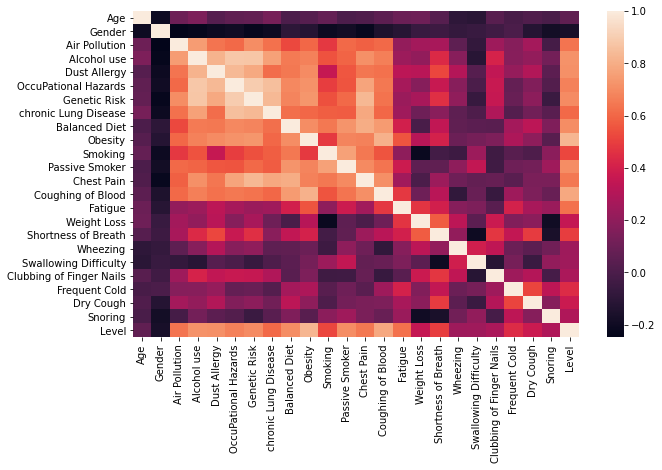

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation_mat)

## PCA Steps

In [12]:
pca = PCA(n_components = 8)

In [13]:
cancer_norm_wo_target = cancer_norm.loc[:, cancer_norm.columns != 'Level']
cancer_norm_wo_target

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.882250,0.509919,-0.387677,-0.980760,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205
996,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,0.882250,2.292852,0.972594,0.332758,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655
997,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
998,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


In [14]:
cancer_norm_wo_target.var(axis = 0)

Age                         1.001001
Gender                      1.001001
Air Pollution               1.001001
Alcohol use                 1.001001
Dust Allergy                1.001001
OccuPational Hazards        1.001001
Genetic Risk                1.001001
chronic Lung Disease        1.001001
Balanced Diet               1.001001
Obesity                     1.001001
Smoking                     1.001001
Passive Smoker              1.001001
Chest Pain                  1.001001
Coughing of Blood           1.001001
Fatigue                     1.001001
Weight Loss                 1.001001
Shortness of Breath         1.001001
Wheezing                    1.001001
Swallowing Difficulty       1.001001
Clubbing of Finger Nails    1.001001
Frequent Cold               1.001001
Dry Cough                   1.001001
Snoring                     1.001001
dtype: float64

In [15]:
cancer_norm_wo_target.cov()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.001001,-0.202288,0.099594,0.151894,0.035237,0.062240,0.073224,0.129081,0.004868,0.034372,...,0.053059,0.095154,0.107053,0.035365,-0.095450,-0.105939,0.039298,-0.012719,0.012140,-0.004705
Gender,-0.202288,1.001001,-0.247159,-0.227864,-0.204517,-0.192536,-0.222950,-0.205266,-0.099841,-0.123937,...,-0.146652,-0.116583,-0.058051,-0.046018,-0.076380,-0.058382,-0.034253,-0.000526,-0.123124,-0.181800
Air Pollution,0.099594,-0.247159,1.001001,0.748041,0.638142,0.609534,0.705982,0.627328,0.525398,0.602070,...,0.608437,0.211936,0.258274,0.269828,0.055423,-0.080999,0.241306,0.174714,0.261750,-0.021364
Alcohol use,0.151894,-0.227864,0.748041,1.001001,0.819463,0.879666,0.878088,0.764340,0.654006,0.669982,...,0.668280,0.237483,0.208059,0.436222,0.180998,-0.114187,0.415408,0.180959,0.211489,0.122817
Dust Allergy,0.035237,-0.204517,0.638142,0.819463,1.001001,0.836696,0.788693,0.620176,0.647845,0.701377,...,0.625917,0.332804,0.322078,0.519201,0.305155,0.031172,0.346060,0.219609,0.300496,0.052897
OccuPational Hazards,0.062240,-0.192536,0.609534,0.879666,0.836696,1.001001,0.893942,0.859143,0.692201,0.722914,...,0.646593,0.268112,0.176402,0.366848,0.179105,-0.002856,0.366814,0.077243,0.160047,0.022939
Genetic Risk,0.073224,-0.222950,0.705982,0.878088,0.788693,0.893942,1.001001,0.837068,0.680585,0.730557,...,0.632869,0.230761,0.272015,0.458659,0.205178,-0.063011,0.358173,0.087179,0.194594,-0.056888
chronic Lung Disease,0.129081,-0.205266,0.627328,0.764340,0.620176,0.859143,0.837068,1.001001,0.623255,0.602357,...,0.603590,0.247945,0.104184,0.182608,0.057271,0.007287,0.298321,0.028787,0.114276,0.043418
Balanced Diet,0.004868,-0.099841,0.525398,0.654006,0.647845,0.692201,0.680585,0.623255,1.001001,0.707630,...,0.745800,0.401079,-0.006550,0.343967,0.063994,0.046854,0.042009,0.264195,0.332327,0.152830
Obesity,0.034372,-0.123937,0.602070,0.669982,0.701377,0.722914,0.730557,0.602357,0.707630,1.001001,...,0.815620,0.553342,0.313809,0.406610,0.094381,0.127340,0.149243,0.288657,0.200819,0.039462


In [16]:
X_pca = pca.fit_transform(cancer_norm_wo_target)

In [17]:
# Cancer_target_column as int
cancer_level_int = cancer_cp['Level'].replace({0.5 : 1, 1:2})
cancer_level_int = cancer_level_int.astype(int)
cancer_level_int


0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [18]:
cancer_level_nomid = cancer_level_int[cancer_level_int != 1]
cancer_level_nomid

0      0
2      2
3      2
4      2
5      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 668, dtype: int64

In [19]:
pca_res_df = pd.DataFrame(np.insert(X_pca, 8, cancer_level_int, axis=1), columns=['feat_1', 'feat_2','feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8','level'])
pca_res_df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,level
0,-2.532266,-0.685606,-0.056142,0.308617,0.220386,-0.737874,0.945114,1.119508,0.0
1,-2.499235,1.046103,-0.491501,-1.867267,0.048575,0.965312,2.804263,-1.099320,1.0
2,1.710896,2.877557,-0.429408,2.537106,-1.172250,-0.785246,1.236987,0.491332,2.0
3,3.931440,-1.240071,-0.945877,1.762592,1.569949,0.688485,0.140719,-0.490061,2.0
4,3.599374,-2.584447,0.532677,0.990432,0.034345,-0.647046,-0.026408,-0.223901,2.0
...,...,...,...,...,...,...,...,...,...
995,3.713500,-1.619119,-1.489599,-1.439826,0.233093,-0.563611,0.171886,-1.071613,2.0
996,4.032301,-0.276395,-0.348625,-1.001961,-1.508341,-0.324732,-1.386595,1.651615,2.0
997,1.512550,2.928770,-0.433276,2.529481,-2.331946,0.658149,0.320186,0.507373,2.0
998,3.355887,-2.564568,0.370874,0.768547,-1.527851,1.766072,-0.140659,0.131220,2.0


In [20]:
pca_res_nomid = pca_res_df[pca_res_df.level != 1]
pca_res_nomid

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,level
0,-2.532266,-0.685606,-0.056142,0.308617,0.220386,-0.737874,0.945114,1.119508,0.0
2,1.710896,2.877557,-0.429408,2.537106,-1.172250,-0.785246,1.236987,0.491332,2.0
3,3.931440,-1.240071,-0.945877,1.762592,1.569949,0.688485,0.140719,-0.490061,2.0
4,3.599374,-2.584447,0.532677,0.990432,0.034345,-0.647046,-0.026408,-0.223901,2.0
5,1.710896,2.877557,-0.429408,2.537106,-1.172250,-0.785246,1.236987,0.491332,2.0
...,...,...,...,...,...,...,...,...,...
995,3.713500,-1.619119,-1.489599,-1.439826,0.233093,-0.563611,0.171886,-1.071613,2.0
996,4.032301,-0.276395,-0.348625,-1.001961,-1.508341,-0.324732,-1.386595,1.651615,2.0
997,1.512550,2.928770,-0.433276,2.529481,-2.331946,0.658149,0.320186,0.507373,2.0
998,3.355887,-2.564568,0.370874,0.768547,-1.527851,1.766072,-0.140659,0.131220,2.0


In [21]:
pca_res_df['level'].value_counts().dtype

dtype('int64')

In [22]:
# Explained Variance 
print(pca.explained_variance_ratio_) # Pretty low explained variance ngl 

[0.39580565 0.11740061 0.08769539 0.06596929 0.05649457 0.05286558
 0.0343725  0.03003148]


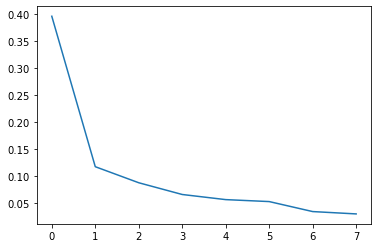

In [23]:
plt.plot(pca.explained_variance_ratio_)

In [24]:
np.sum(pca.explained_variance_ratio_)

0.8406350587734861

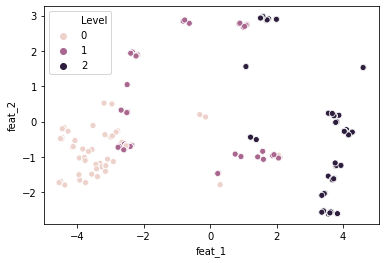

In [25]:
sns.scatterplot(data=pca_res_df, x='feat_1', y='feat_2', hue = cancer_level_int)

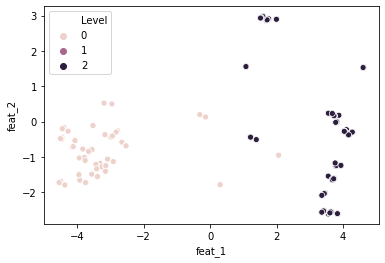

In [26]:
sns.scatterplot(data=pca_res_nomid, x='feat_1', y='feat_2', hue = cancer_level_nomid)

### 3D Plots to Check if Really the third cluster exists on third plane

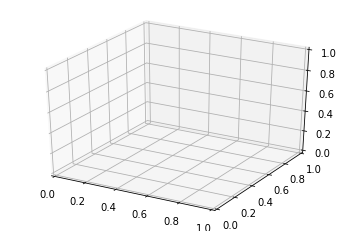

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [28]:
temp =pd.Categorical(pca_res_df['level'])
my_color=temp.codes

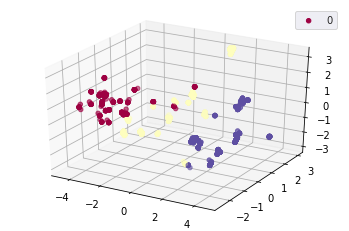

In [29]:
ax = plt.axes(projection = '3d')
sns.set_style('dark')
scatter_1 = ax.scatter3D(pca_res_df['feat_1'], pca_res_df['feat_2'], pca_res_df['feat_3'], c = my_color, cmap = 'Spectral', label = '0')
ax.legend()

## Train-Test Split

In [30]:
#  splits our X and y into train and test sets, with the testing data being 25% of the size of the training set
X_train, X_test, y_train, y_test = train_test_split(pca_res_df[['feat_1', 'feat_2', 'feat_3']],cancer_level_int , test_size=0.75)

In [31]:
X_train

,feat_1,feat_2,feat_3
887,3.355887,-2.564568,0.370874
193,0.892358,2.785384,3.092002
177,-2.183258,1.889725,-1.658858
467,3.728011,0.167952,1.014241
345,1.600334,-1.068170,-2.315822
...,...,...,...
666,1.990657,2.893786,-0.205583
520,-2.238432,1.851428,-1.851890
652,3.673374,-1.646972,-1.629986
261,-0.313638,0.197996,0.412216


In [32]:
pd.DataFrame(X_test)

,feat_1,feat_2,feat_3
777,1.990657,2.893786,-0.205583
514,-2.584517,-0.787180,-1.383079
18,4.606017,1.533905,-1.392639
168,1.878598,-0.964135,2.179188
942,-3.416206,-1.338478,0.950142
...,...,...,...
284,-3.525901,-0.112137,0.305336
273,-2.830726,-0.298654,0.448680
891,3.625617,-2.555303,0.559602
161,-4.503955,-0.482548,0.684352


# KNN 

In [33]:
classifier = KNeighborsClassifier(n_neighbors= 1) # Initialize a classifier here
## Fit and predict using X_train, y_train, and X_test
classifier.fit(X_train, y_train) # Fit classifier to your X_train and y_train
pred = classifier.predict(X_test)  # Generate predictions based on X_test

In [34]:
pred

array([2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1,
       2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1,

## Scoring Metric

In [35]:
score = sum(pred == y_test) / len(pred)
score

0.9866666666666667

In [36]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[220  10   0]
 [  0 246   0]
 [  0   0 274]]


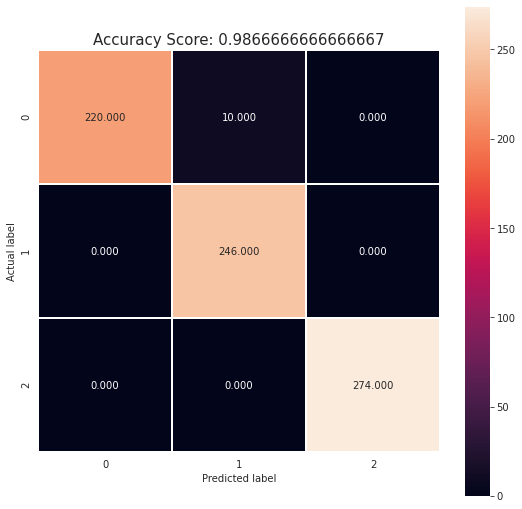

In [37]:
fig = plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
fig.savefig('KNN_other Classifier Scoring Metric')

### Determining Optimal K

Minimum error: 0.013333333333333334 at K = 1


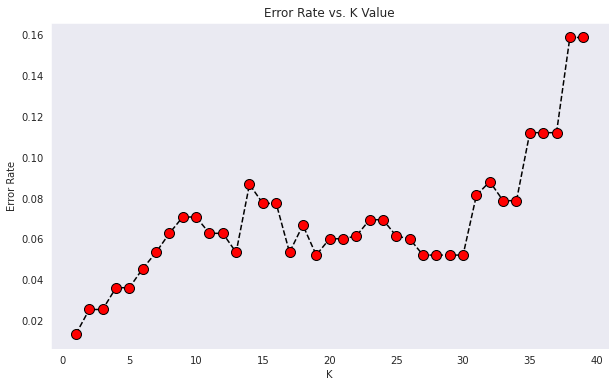

In [38]:
error_rate = []
for i in list(range(1,40)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(list(range(1,40)),error_rate,color='black', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))
#plt.savefig('100_KNN')

## Accuracy and Consistency Test

In [57]:
cm_list = []
scores_50 = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(pca_res_df[['feat_1', 'feat_2', 'feat_3']],cancer_level_int , test_size=0.75)
    
    classifier = KNeighborsClassifier(n_neighbors= 1) # Initialize a classifier here
    ## Fit and predict using X_train, y_train, and X_test
    classifier.fit(X_train, y_train) # Fit classifier to your X_train and y_train
    pred = classifier.predict(X_test)  # Generate predictions based on X_test
    
    score = sum(pred == y_test) / len(pred)
    scores_50.append(score)
    
    cm = metrics.confusion_matrix(y_test, pred)
    cm_list.append(cm)
scores_50[:10]

[0.9866666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9866666666666667,
 0.9733333333333334,
 1.0,
 0.9866666666666667,
 1.0]

In [58]:
cm_array = np.array(cm_list)
cm_array[0].reshape(1,9)

array([[215,  10,   0,   0, 253,   0,   0,   0, 272]])

In [59]:
scores_df = pd.DataFrame(scores_50, columns = ['scores'])
scores_df

,scores
0,0.986667
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
995,1.000000
996,1.000000
997,0.986667
998,1.000000


In [60]:
def truncate(x):
    return float("{:.3f}".format(x))

In [61]:
scores_df['scores_tru'] = scores_df['scores'].apply(truncate)

In [62]:
scores_df['scores_tru'].value_counts()

1.000    662
0.987    287
0.973     42
0.960      4
0.976      2
0.963      2
0.947      1
Name: scores_tru, dtype: int64

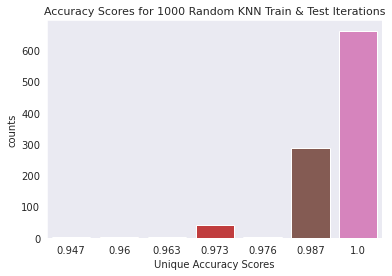

In [64]:
figures = sns.countplot(data = scores_df, x = 'scores_tru')
plt.title('Accuracy Scores for 1000 Random KNN Train & Test Iterations', fontsize = 11)
plt.xlabel('Unique Accuracy Scores')
plt.ylabel('counts')
plt.savefig('Consistency Metric 1000')